In [ ]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/Aravinda-Loshan/Desktop/Males.csv'
data = pd.read_csv(file_path)

# Step 1: Data Deduplication
deduplicated_data = data.drop_duplicates()

# Step 2: Replacing Values (standardizing categorical values)
# For example, standardizing "yes" and "no" entries to lowercase for consistency
deduplicated_data['union'] = deduplicated_data['union'].str.lower()
deduplicated_data['maried'] = deduplicated_data['maried'].str.lower()
deduplicated_data['health'] = deduplicated_data['health'].str.lower()

# Step 3: Discretization and Binning of the 'wage' column
# Creating bins for 'wage' into 'Low', 'Medium', 'High'
wage_bins = [0, 1.5, 3, deduplicated_data['wage'].max()]
wage_labels = ['Low', 'Medium', 'High']
deduplicated_data['wage_bin'] = pd.cut(deduplicated_data['wage'], bins=wage_bins, labels=wage_labels)

# Step 4: Handling Missing Data in 'residence' column
# Using traditional method: Filling missing values with the mode of the column
residence_mode = deduplicated_data['residence'].mode()[0]
deduplicated_data['residence_filled'] = deduplicated_data['residence'].fillna(residence_mode)

# Display the first few rows of the updated dataset
print(deduplicated_data.head())


   rownames  nr  year  school  exper union   ethn maried health      wage  \
0         1  13  1980      14      1    no  other     no     no  1.197540   
1         2  13  1981      14      2   yes  other     no     no  1.853060   
2         3  13  1982      14      3    no  other     no     no  1.344462   
3         4  13  1983      14      4    no  other     no     no  1.433213   
4         5  13  1984      14      5    no  other     no     no  1.568125   

                      industry                      occupation   residence  \
0  Business_and_Repair_Service                 Service_Workers  north_east   
1             Personal_Service                 Service_Workers  north_east   
2  Business_and_Repair_Service                 Service_Workers  north_east   
3  Business_and_Repair_Service                 Service_Workers  north_east   
4             Personal_Service  Craftsmen, Foremen_and_kindred  north_east   

  wage_bin residence_filled  
0      Low       north_east  
1   Medi

Statistical Summary of 'wage':
 count    4360.000000
mean        1.649147
std         0.532609
min        -3.579079
25%         1.350717
50%         1.671143
75%         1.991086
max         4.051860
Name: wage, dtype: float64

Correlation between 'school' and 'wage':
           school      wage
school  1.000000  0.252132
wage    0.252132  1.000000


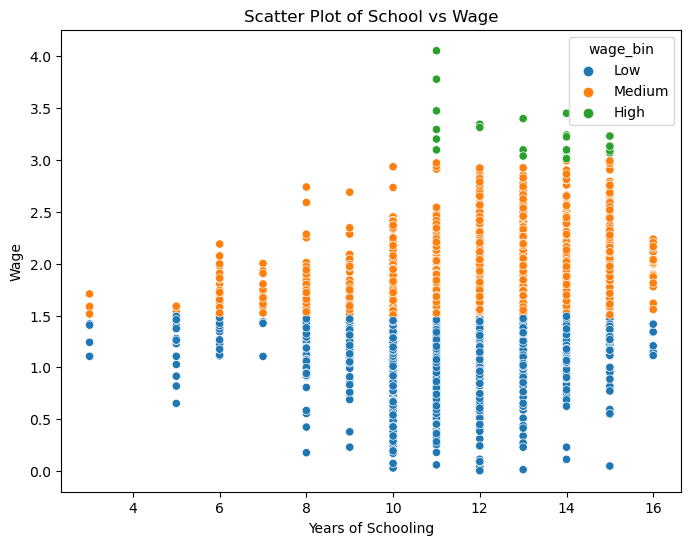

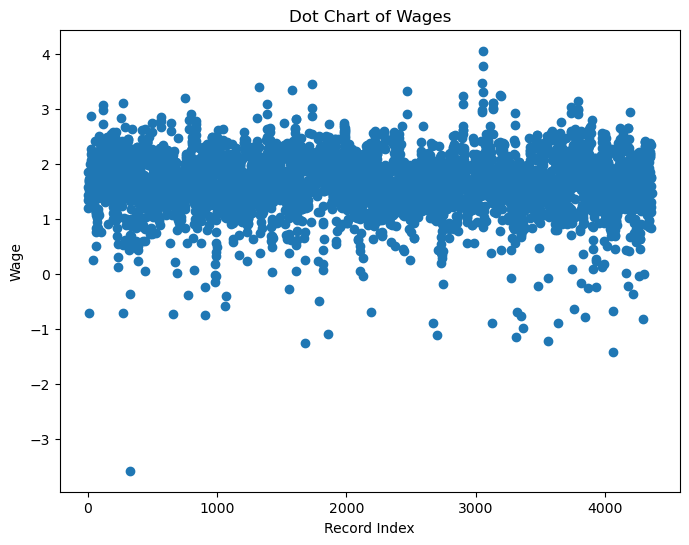

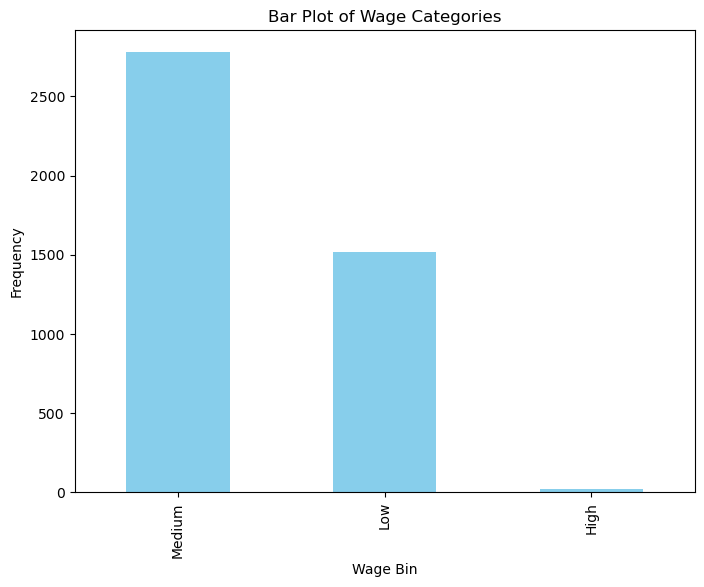

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Task 3: 1-D Analysis (Statistical Summary)
print("Statistical Summary of 'wage':\n", deduplicated_data['wage'].describe())

# 2-D Analysis: Correlation between `school` and `wage`
correlation = deduplicated_data[['school', 'wage']].corr()
print("\nCorrelation between 'school' and 'wage':\n", correlation)

# Visualization: Scatter plot between `school` and `wage`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=deduplicated_data, x='school', y='wage', hue='wage_bin')
plt.title("Scatter Plot of School vs Wage")
plt.xlabel("Years of Schooling")
plt.ylabel("Wage")
plt.show()

# Visualization: Dot chart for `wage`
plt.figure(figsize=(8, 6))
plt.plot(deduplicated_data['rownames'], deduplicated_data['wage'], 'o')
plt.title("Dot Chart of Wages")
plt.xlabel("Record Index")
plt.ylabel("Wage")
plt.show()

# Visualization: Bar plot of `wage_bin`
plt.figure(figsize=(8, 6))
deduplicated_data['wage_bin'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Bar Plot of Wage Categories")
plt.xlabel("Wage Bin")
plt.ylabel("Frequency")
plt.show()


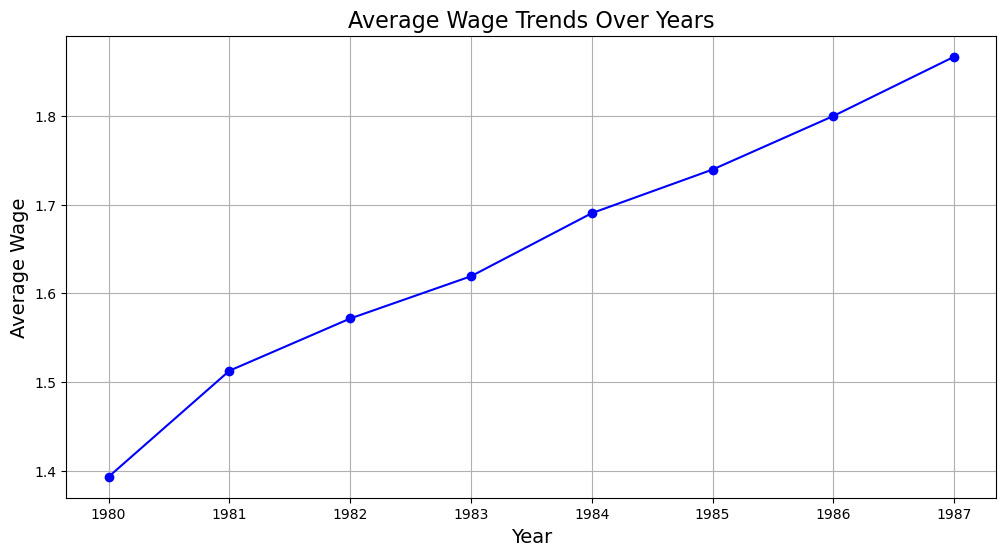

In [ ]:
import matplotlib.pyplot as plt
# Aggregate data by year to calculate the average wage
yearly_wage_trends = data.groupby('year')['wage'].mean()

# Plot the average wage over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_wage_trends.index, yearly_wage_trends.values, marker='o', linestyle='-', color='b')
plt.title('Average Wage Trends Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Wage', fontsize=14)
plt.grid(True)
plt.show()

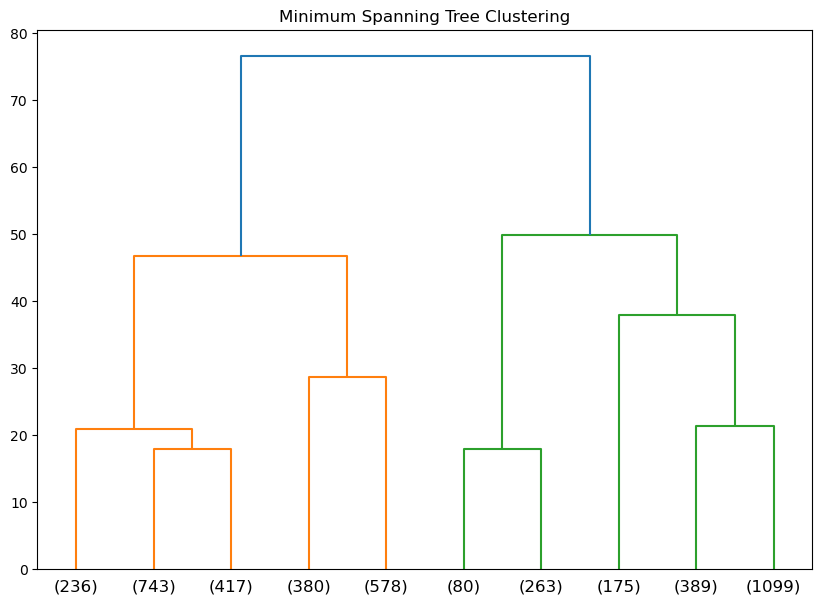

KMeans Cluster Centers:
 [[-1.63074729 -0.51737125]
 [ 0.47833061  0.77939993]
 [ 0.12765909 -0.69792634]]

Outliers Detected:
       school      wage  Spectral_Cluster  KMeans_Cluster
6         14 -0.720263                 1               2
40        10  0.258555                 1               0
118       15  2.966396                 1               1
119       15  3.065052                 1               1
230       12  0.114716                 1               2
...      ...       ...               ...             ...
4207      16  1.812689                 1               1
4216      12 -0.369078                 1               2
4265      11 -0.032790                 1               2
4296      12 -0.815365                 1               2
4304      12  0.004076                 1               2

[140 rows x 4 columns]


In [ ]:
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Normalize data for clustering
scaler = StandardScaler()
cluster_data = deduplicated_data[['school', 'wage']].dropna()
scaled_data = scaler.fit_transform(cluster_data)

# 1. Spectral Clustering
spectral_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral_model.fit_predict(scaled_data)
cluster_data['Spectral_Cluster'] = spectral_labels

# 2. Minimum Spanning Tree Clustering (using hierarchical clustering)
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title("Minimum Spanning Tree Clustering")
plt.show()

# 3. Model-Based Clustering: Expectation-Maximization
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
print("KMeans Cluster Centers:\n", kmeans.cluster_centers_)

# 4. Outlier Detection
outliers = cluster_data[distance_matrix(scaled_data, kmeans.cluster_centers_).min(axis=1) > 2]
print("\nOutliers Detected:\n", outliers)



Explained Variance Ratio (PCA): [0.62606616 0.37393384]


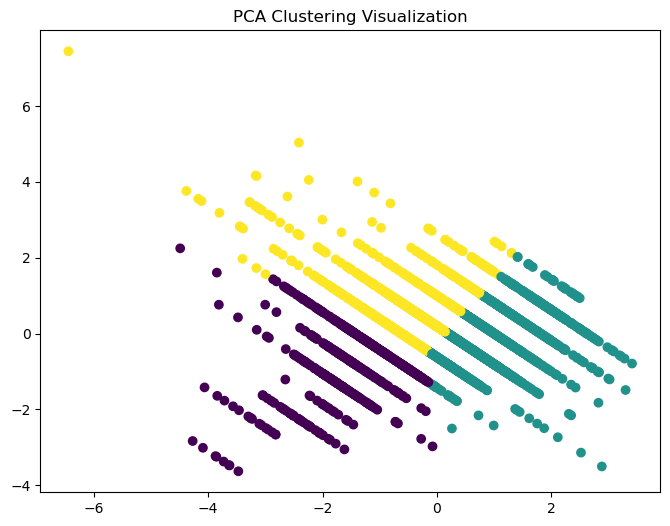

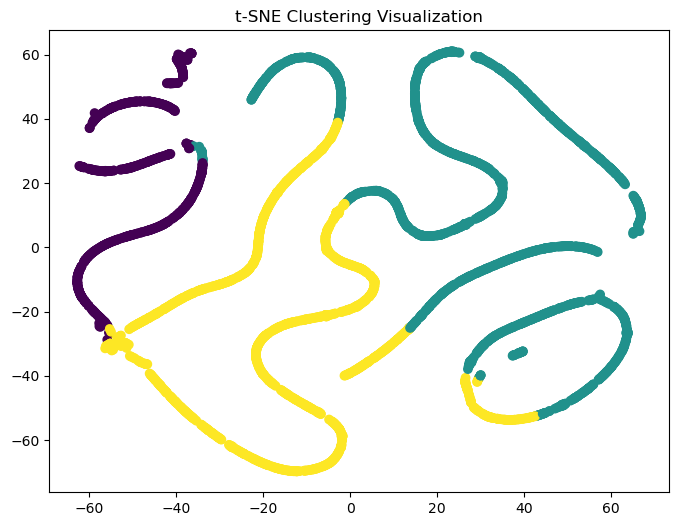

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS

# 1. PCA (Linear Method)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
print("\nExplained Variance Ratio (PCA):", pca.explained_variance_ratio_)

# 2. t-SNE (Non-linear Method)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Visualization of PCA and t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_data['KMeans_Cluster'], cmap='viridis')
plt.title("PCA Clustering Visualization")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_data['KMeans_Cluster'], cmap='viridis')
plt.title("t-SNE Clustering Visualization")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Linear Regression Model
X = deduplicated_data[['school', 'exper']].dropna()
y = deduplicated_data['wage'][X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nLinear Regression Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

# Understanding Reinforcement Learning: Example
print("\nReinforcement Learning (RL) differs from supervised learning as RL involves learning through trial and error by interacting with an environment.")
# For RL examples, libraries like OpenAI Gym or custom RL environments are used.



Linear Regression Evaluation:
Mean Squared Error: 0.24
R-Squared: 0.14

Reinforcement Learning (RL) differs from supervised learning as RL involves learning through trial and error by interacting with an environment.


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/Aaradhya Negi/Desktop/Males.csv'
data = pd.read_csv(file_path)

# Step 1: Data Deduplication
deduplicated_data = data.drop_duplicates()

# Step 2: Replacing Values (standardizing categorical values)
# For example, standardizing "yes" and "no" entries to lowercase for consistency
deduplicated_data['union'] = deduplicated_data['union'].str.lower()
deduplicated_data['maried'] = deduplicated_data['maried'].str.lower()
deduplicated_data['health'] = deduplicated_data['health'].str.lower()

# Step 3: Discretization and Binning of the 'wage' column
# Creating bins for 'wage' into 'Low', 'Medium', 'High'
wage_bins = [0, 1.5, 3, deduplicated_data['wage'].max()]
wage_labels = ['Low', 'Medium', 'High']
deduplicated_data['wage_bin'] = pd.cut(deduplicated_data['wage'], bins=wage_bins, labels=wage_labels)

# Step 4: Handling Missing Data in 'residence' column
# Using traditional method: Filling missing values with the mode of the column
residence_mode = deduplicated_data['residence'].mode()[0]
deduplicated_data['residence_filled'] = deduplicated_data['residence'].fillna(residence_mode)

# Display the first few rows of the updated dataset
print(deduplicated_data.head())


   rownames  nr  year  school  exper union   ethn maried health      wage  \
0         1  13  1980      14      1    no  other     no     no  1.197540   
1         2  13  1981      14      2   yes  other     no     no  1.853060   
2         3  13  1982      14      3    no  other     no     no  1.344462   
3         4  13  1983      14      4    no  other     no     no  1.433213   
4         5  13  1984      14      5    no  other     no     no  1.568125   

                      industry                      occupation   residence  \
0  Business_and_Repair_Service                 Service_Workers  north_east   
1             Personal_Service                 Service_Workers  north_east   
2  Business_and_Repair_Service                 Service_Workers  north_east   
3  Business_and_Repair_Service                 Service_Workers  north_east   
4             Personal_Service  Craftsmen, Foremen_and_kindred  north_east   

  wage_bin residence_filled  
0      Low       north_east  
1   Medi

Statistical Summary of 'wage':
 count    4360.000000
mean        1.649147
std         0.532609
min        -3.579079
25%         1.350717
50%         1.671143
75%         1.991086
max         4.051860
Name: wage, dtype: float64

Correlation between 'school' and 'wage':
           school      wage
school  1.000000  0.252132
wage    0.252132  1.000000


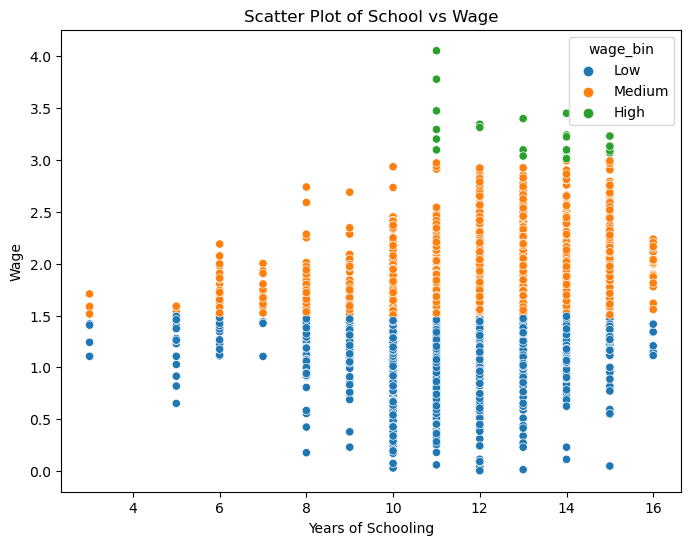

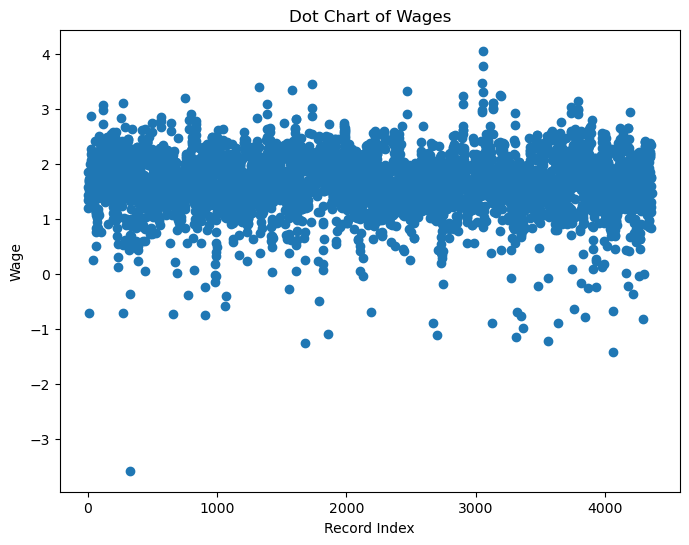

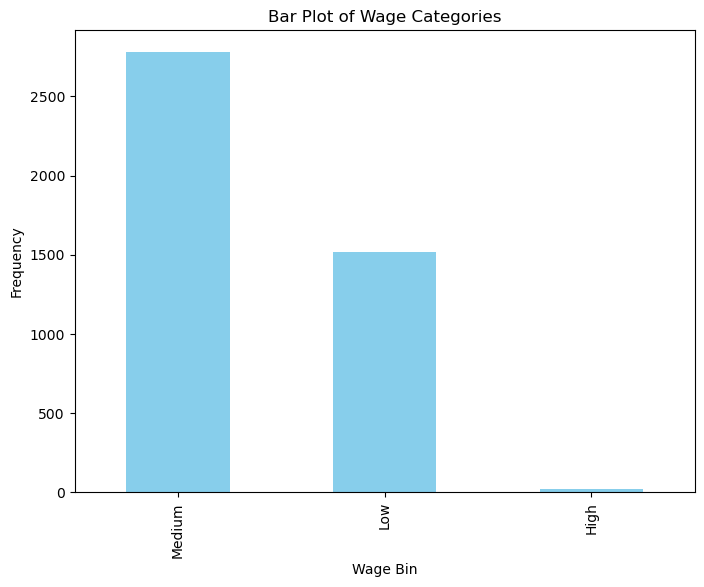

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Task 3: 1-D Analysis (Statistical Summary)
print("Statistical Summary of 'wage':\n", deduplicated_data['wage'].describe())

# 2-D Analysis: Correlation between `school` and `wage`
correlation = deduplicated_data[['school', 'wage']].corr()
print("\nCorrelation between 'school' and 'wage':\n", correlation)

# Visualization: Scatter plot between `school` and `wage`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=deduplicated_data, x='school', y='wage', hue='wage_bin')
plt.title("Scatter Plot of School vs Wage")
plt.xlabel("Years of Schooling")
plt.ylabel("Wage")
plt.show()

# Visualization: Dot chart for `wage`
plt.figure(figsize=(8, 6))
plt.plot(deduplicated_data['rownames'], deduplicated_data['wage'], 'o')
plt.title("Dot Chart of Wages")
plt.xlabel("Record Index")
plt.ylabel("Wage")
plt.show()

# Visualization: Bar plot of `wage_bin`
plt.figure(figsize=(8, 6))
deduplicated_data['wage_bin'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Bar Plot of Wage Categories")
plt.xlabel("Wage Bin")
plt.ylabel("Frequency")
plt.show()


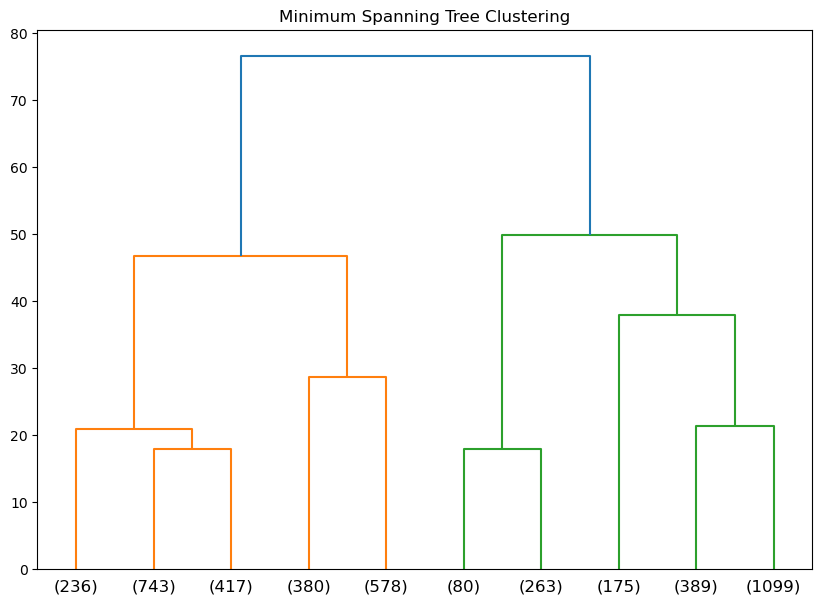

KMeans Cluster Centers:
 [[-1.63074729 -0.51737125]
 [ 0.47833061  0.77939993]
 [ 0.12765909 -0.69792634]]

Outliers Detected:
       school      wage  Spectral_Cluster  KMeans_Cluster
6         14 -0.720263                 1               2
40        10  0.258555                 1               0
118       15  2.966396                 1               1
119       15  3.065052                 1               1
230       12  0.114716                 1               2
...      ...       ...               ...             ...
4207      16  1.812689                 1               1
4216      12 -0.369078                 1               2
4265      11 -0.032790                 1               2
4296      12 -0.815365                 1               2
4304      12  0.004076                 1               2

[140 rows x 4 columns]


In [ ]:
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Normalize data for clustering
scaler = StandardScaler()
cluster_data = deduplicated_data[['school', 'wage']].dropna()
scaled_data = scaler.fit_transform(cluster_data)

# 1. Spectral Clustering
spectral_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral_model.fit_predict(scaled_data)
cluster_data['Spectral_Cluster'] = spectral_labels

# 2. Minimum Spanning Tree Clustering (using hierarchical clustering)
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title("Minimum Spanning Tree Clustering")
plt.show()

# 3. Model-Based Clustering: Expectation-Maximization
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
print("KMeans Cluster Centers:\n", kmeans.cluster_centers_)

# 4. Outlier Detection
outliers = cluster_data[distance_matrix(scaled_data, kmeans.cluster_centers_).min(axis=1) > 2]
print("\nOutliers Detected:\n", outliers)



Explained Variance Ratio (PCA): [0.62606616 0.37393384]


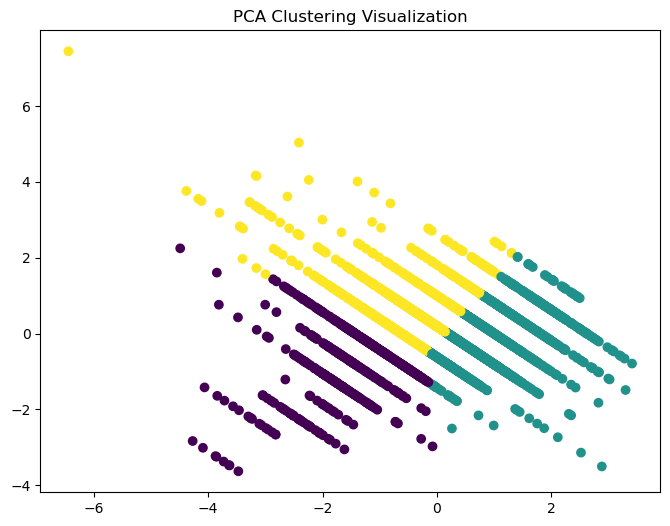

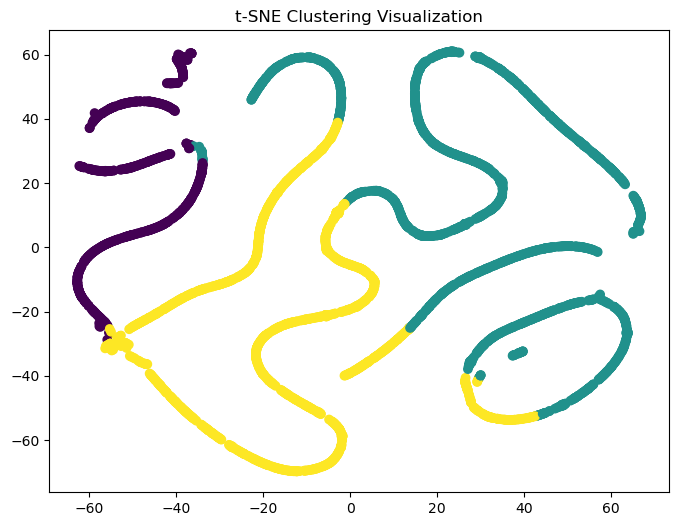

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS

# 1. PCA (Linear Method)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
print("\nExplained Variance Ratio (PCA):", pca.explained_variance_ratio_)

# 2. t-SNE (Non-linear Method)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Visualization of PCA and t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_data['KMeans_Cluster'], cmap='viridis')
plt.title("PCA Clustering Visualization")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_data['KMeans_Cluster'], cmap='viridis')
plt.title("t-SNE Clustering Visualization")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Linear Regression Model
X = deduplicated_data[['school', 'exper']].dropna()
y = deduplicated_data['wage'][X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nLinear Regression Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

# Understanding Reinforcement Learning: Example
print("\nReinforcement Learning (RL) differs from supervised learning as RL involves learning through trial and error by interacting with an environment.")
# For RL examples, libraries like OpenAI Gym or custom RL environments are used.



Linear Regression Evaluation:
Mean Squared Error: 0.24
R-Squared: 0.14

Reinforcement Learning (RL) differs from supervised learning as RL involves learning through trial and error by interacting with an environment.
